In [2]:
import emd
import numpy as np
from scipy.fft import fft
from scipy.signal import hilbert

import matplotlib.pyplot as plt
import FeatureExtraction

<Axes: xlabel='Time (samples)'>

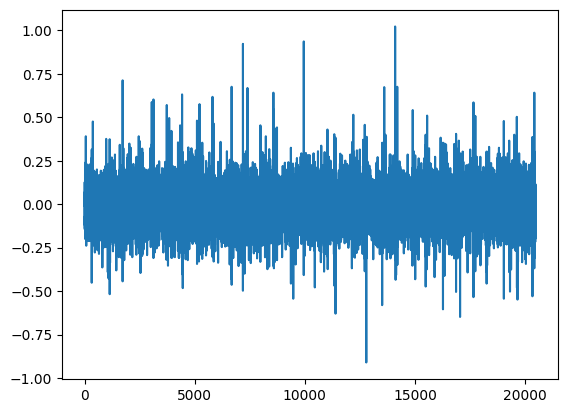

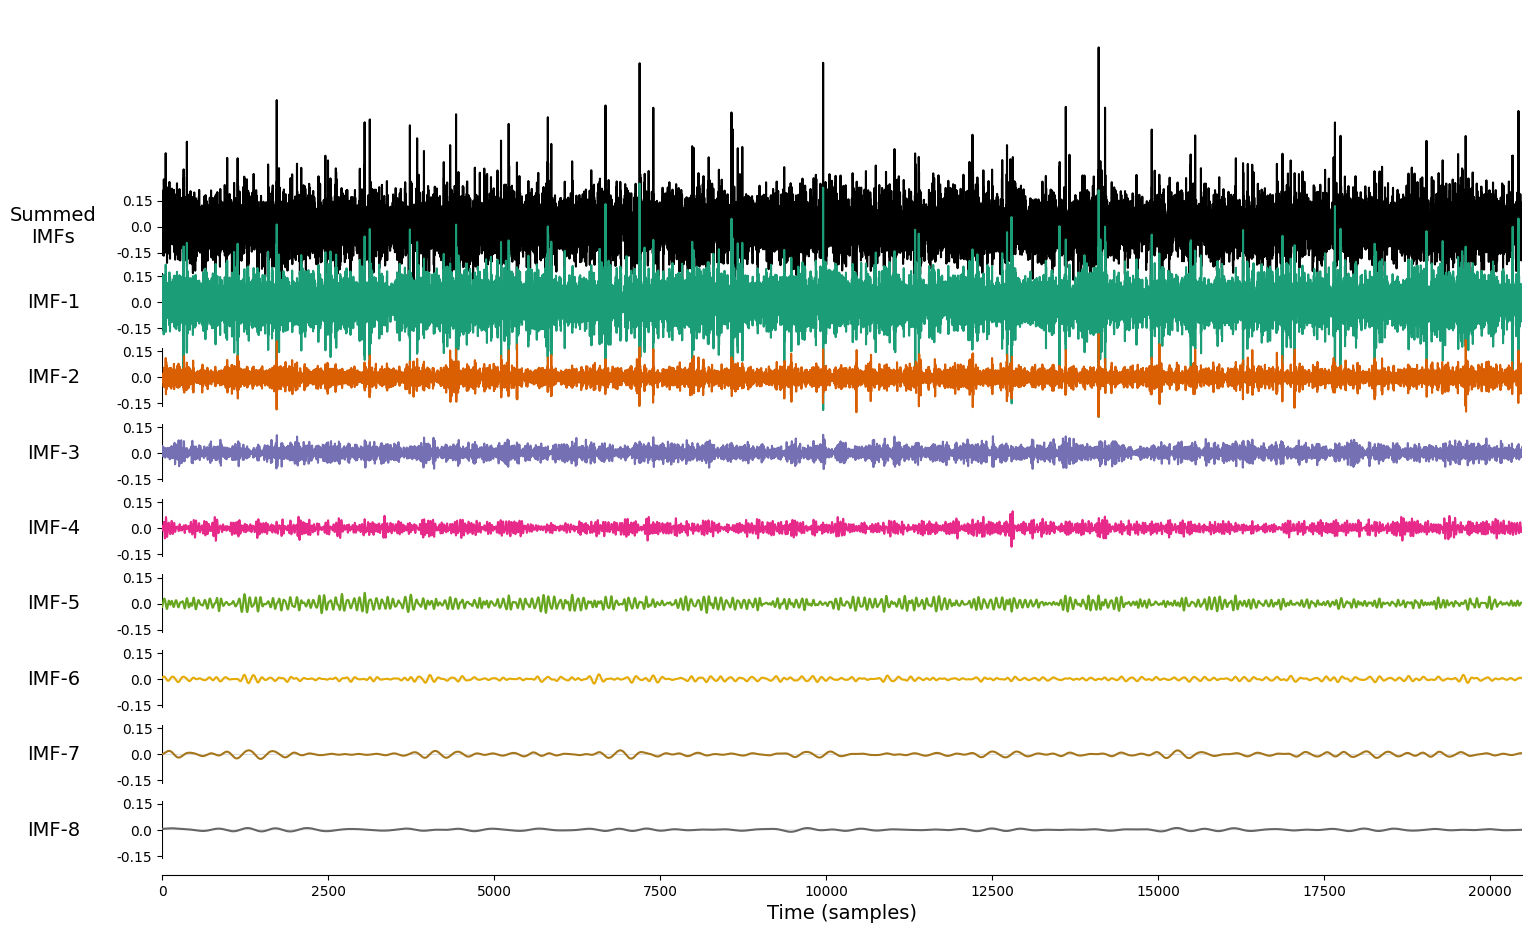

In [3]:
featureExtraction = FeatureExtraction.FeatureExtraction("data/IMS/2nd_test/2nd_test/2004.02.12.10.32.39")
data = featureExtraction.getData()

# FIX FF DAT IE NIET DE EERSTE WAARDE ALS INDEX GEBRUIKT
data['-0.132'].plot()

x = np.array(data['-0.132'])

# imf = emd.sift.mask_sift(x, max_imfs=8)
imf = emd.sift.mask_sift(x, max_imfs=8)


emd.plotting.plot_imfs(imf[:, :])

In [32]:
imf1 = imf[:, 0]
imf2 = imf[:, 1]

hilbert_imf1 = hilbert(imf1)
hilbert_imf2 = hilbert(imf2)

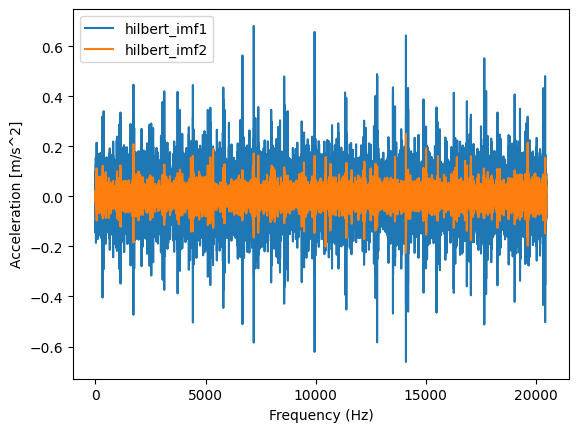

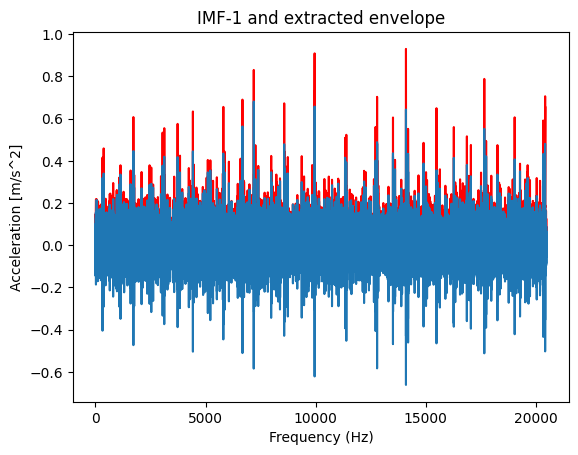

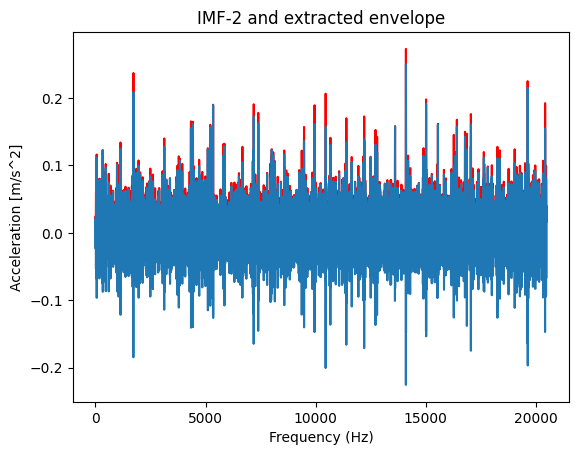

In [39]:
plt.plot(hilbert_imf1, label="hilbert_imf1")
plt.plot(hilbert_imf2, label="hilbert_imf2")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Acceleration [m/s^2]")
plt.legend()
plt.show()

envelope_imf1 = np.abs(hilbert_imf1) #envelope extraction
envelope_imf2 = np.abs(hilbert_imf2)

plt.plot(envelope_imf1,'r')
plt.title("IMF-1 and extracted envelope")
plt.plot(imf1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Acceleration [m/s^2]")
plt.show()

plt.plot(envelope_imf2,'r')
plt.title("IMF-2 and extracted envelope")
plt.plot(imf2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Acceleration [m/s^2]")
plt.show()

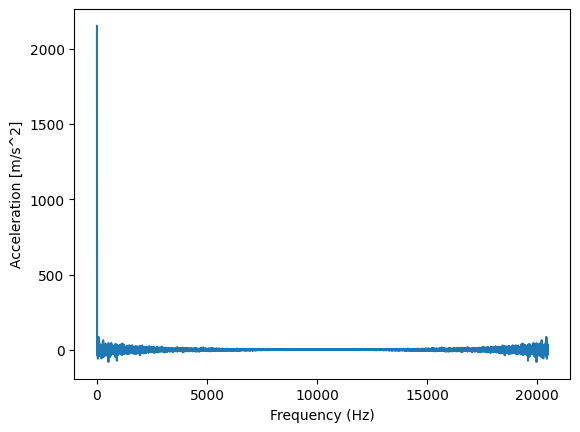

In [40]:
envelope_fourier = fft(envelope_imf1)

plt.plot(envelope_fourier)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Acceleration [m/s^2]")
plt.show()